***
# Model Deployment : Estimating Heart Failure Survival Risk Profiles From Cardiovascular, Hematologic And Metabolic Markers

***
### John Pauline Pineda <br> <br> *September 21, 2024*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Predictive Model Development](#1.6)
        * [1.6.1 Pre-Modelling Data Preparation](#1.6.1)
        * [1.6.2 Data Splitting](#1.6.2)
        * [1.6.3 Modelling Pipeline Development](#1.6.3)
        * [1.6.4 Semi-Parametric Model Fitting | Hyperparameter Tuning | Validation](#1.6.4)
        * [1.6.5 Parametric Model Fitting | Hyperparameter Tuning | Validation](#1.6.5)
        * [1.6.6 Model Selection](#1.6.7)
        * [1.6.7 Model Testing](#1.6.8)
        * [1.6.8 Model Inference](#1.6.9)
    * [1.7 Predictive Model Deployment Using Streamlit and Streamlit Community Cloud](#1.7)
        * [1.7.1 Model Prediction Application Code Development](#1.7.1)
        * [1.7.2 Model Application Programming Interface Code Development](#1.7.2)
        * [1.7.3 User Interface Application Code Development](#1.7.3)
        * [1.7.4 Web Application](#1.7.4)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

[Survival Analysis](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) deals with the analysis of time-to-event data. It focuses on the expected duration of time until one or more events of interest occur, such as death, failure, or relapse. This type of analysis is used to study and model the time until the occurrence of an event, taking into account that the event might not have occurred for all subjects during the study period. Several key aspects of survival analysis include the survival function which refers to the probability that an individual survives longer than a certain time, hazard function which describes the instantaneous rate at which events occur, given no prior event, and censoring pertaining to a condition where the event of interest has not occurred for some subjects during the observation period.

[Right-Censored Survival Data](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) occurs when the event of interest has not happened for some subjects by the end of the study period or the last follow-up time. This type of censoring is common in survival analysis because not all individuals may experience the event before the study ends, or they might drop out or be lost to follow-up. Right-censored data is crucial in survival analysis as it allows the inclusion of all subjects in the analysis, providing more accurate and reliable estimates.

[Survival Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) refer to statistical methods used to analyze survival data, accounting for censored observations. These models aim to describe the relationship between survival time and one or more predictor variables, and to estimate the survival function and hazard function. Survival models are essential for understanding the factors that influence time-to-event data, allowing for predictions and comparisons between different groups or treatment effects. They are widely used in clinical trials, reliability engineering, and other areas where time-to-event data is prevalent.

[Cox Proportional Hazards Regression Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) relates the time until an event occurs (such as death or disease progression) to one or more predictor variables. The model is expressed through its hazard function, which represents the risk of the event happening at a particular time for an individual, given that the individual has survived up to that time. The mathematical equation is represented by the baseline hazard function (referring to the hazard for an individual when all of their covariates are zero, representing the inherent risk of the event happening over time, but is not directly estimated in the Cox model. Instead, the focus is on how the covariates influence the hazard relative to this baseline) and an exponential term that modifies the baseline hazard based on the individual's covariates (Each covariate is associated with a regression coefficient which measures the strength and direction of the effect of the covariate on the hazard. The exponential function ensures that the hazard is always positive, as hazard values can’t be negative). The proportional hazards assumption in this model means that the ratio of hazards between any two individuals is constant over time and is determined by the differences in their covariates. The Cox model doesn’t require a specific form for the baseline hazard, making it flexible, while properly accounting for censored data, which is common in survival studies.

[Accelerated Failure Time Models](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) are a class of survival analysis models used to analyze time-to-event data by directly modelling the survival time itself. An AFT model assumes that the effect of covariates accelerates or decelerates the life time of an event by some constant factor. The mathematical equation is represented by the logarithm of the survival time being equal to the sum of the vector of covariates multiplied to the vector of regression coefficients; and the product of the scale parameter and a random variable with a specified distribution. In an AFT model, the coefficients represent the multiplicative effect on the survival time. An exponentiated regression coefficient greater than one prolongs survival time, while a value less than one shortens it. The scale parameter determines the spread or variability of survival times. AFT models assume that the effect of covariates on survival time is multiplicative and that the survival times can be transformed to follow a specific distribution.

[Regularization Methods](http://appliedpredictivemodeling.com/), in the context of binary classification using Logistic Regression, are primarily used to prevent overfitting and improve the model's generalization to new data. Overfitting occurs when a model is too complex and learns not only the underlying pattern in the data but also the noise. This leads to poor performance on unseen data. Regularization introduces a penalty for large coefficients in the model, which helps in controlling the model complexity. In Logistic Regression, this is done by adding a regularization term to the loss function, which penalizes large values of the coefficients. This forces the model to keep the coefficients small, thereby reducing the likelihood of overfitting. Addiitonally, by penalizing the complexity of the model through the regularization term, regularization methods also help the model generalize better to unseen data. This is because the model is less likely to overfit the training data and more likely to capture the true underlying pattern.

[Shapley Additive Explanations](https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) are based on Shapley values developed in the cooperative game theory. The process involves explaining a prediction by assuming that each explanatory variable for an instance is a player in a game where the prediction is the payout. The game is the prediction task for a single instance of the data set. The gain is the actual prediction for this instance minus the average prediction for all instances. The players are the explanatory variable values of the instance that collaborate to receive the gain (predict a certain value). The determined value is the average marginal contribution of an explanatory variable across all possible coalitions.

[FastAPI](https://fastapi.tiangolo.com/) is a modern, fast (high-performance) web framework for building APIs with Python. It’s designed to make it easy to create APIs quickly, while still providing strong validation and type hints that improve both code quality and performance. FastAPI allows building APIs by defining endpoints, which are essentially routes that handle HTTP requests. Routes are defined in Python functions, and FastAPI takes care of handling the request, validating input data, and generating responses. Significant features include high performance (FastAPI is one of the fastest Python frameworks, comparable to Node.js and Go, making it ideal for production use, especially in applications that require low latency, such as machine learning model inference), asynchronous support (FastAPI natively supports asynchronous programming, which is great for handling multiple requests concurrently, improving performance in scenarios with high traffic), data validation (FastAPI automatically validates the data coming into the API based on type annotations. If the user sends incorrect data (e.g., wrong data type), FastAPI generates informative error messages), and auto-generated documentation (FastAPI automatically generates API documentation in both Swagger UI and ReDoc formats. This makes testing and understanding the created API simple and fast for developers and stakeholders). In the context of machine learning model deployment, FastAPI acts as the backend API that handles requests for predictions. When a client or application (like a frontend UI) sends data to the API, FastAPI passes it to the model, retrieves the model’s prediction, and sends the result back to the client.

[Streamlit](https://streamlit.io/) is an open-source Python library that simplifies the creation and deployment of web applications for machine learning and data science projects. It allows developers and data scientists to turn Python scripts into interactive web apps quickly without requiring extensive web development knowledge. Streamlit seamlessly integrates with popular Python libraries such as Pandas, Matplotlib, Plotly, and TensorFlow, allowing one to leverage existing data processing and visualization tools within the application. Streamlit apps can be easily deployed on various platforms, including Streamlit Community Cloud, Heroku, or any cloud service that supports Python web applications.

[Streamlit Community Cloud](https://streamlit.io/cloud), formerly known as Streamlit Sharing, is a free cloud-based platform provided by Streamlit that allows users to easily deploy and share Streamlit apps online. It is particularly popular among data scientists, machine learning engineers, and developers for quickly showcasing projects, creating interactive demos, and sharing data-driven applications with a wider audience without needing to manage server infrastructure. Significant features include free hosting (Streamlit Community Cloud provides free hosting for Streamlit apps, making it accessible for users who want to share their work without incurring hosting costs), easy deployment (users can connect their GitHub repository to Streamlit Community Cloud, and the app is automatically deployed from the repository), continuous deployment (if the code in the connected GitHub repository is updated, the app is automatically redeployed with the latest changes), 
sharing capabilities (once deployed, apps can be shared with others via a simple URL, making it easy for collaborators, stakeholders, or the general public to access and interact with the app), built-in authentication (users can restrict access to their apps using GitHub-based authentication, allowing control over who can view and interact with the app), and community support (the platform is supported by a community of users and developers who share knowledge, templates, and best practices for building and deploying Streamlit apps).

## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Heart Failure Dataset](https://paperswithcode.com/dataset/survival-analysis-of-heart-failure-patients) from [Papers With Code](https://paperswithcode.com/) (with all credits attributed to [Saurav Mishra](https://paperswithcode.com/search?q=author%3ASaurav+Mishra)) was used for the analysis as consolidated from the following primary source: 
1. Research Paper entitled **A Comparative Study for Time-to-Event Analysis and Survival Prediction for Heart Failure Condition using Machine Learning Techniques** from the [Journal of Electronics, Electromedical Engineering, and Medical Informatics](http://jeeemi.org/index.php/jeeemi/article/view/225/94)
2. Research Paper entitled **Machine Learning Can Predict Survival of Patients with Heart Failure from Serum Creatinine and Ejection Fraction Alone** from the [BMC Medical Informatics and Decision Making](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5) Journal

This study hypothesized that cardiovascular, hematologic, and metabolic markers influence heart failure survival risks between patients.

The event status and survival duration variables for the study are:
* <span style="color: #FF0000">DEATH_EVENT</span> - Status of the patient within the follow-up period (0, censored | 1, death)
* <span style="color: #FF0000">TIME</span> - Follow-up period (Days)

The predictor variables for the study are:
* <span style="color: #FF0000">AGE</span> - Patient's age (Years)
* <span style="color: #FF0000">ANAEMIA</span> - Hematologic marker for the indication of anaemia (decrease of red blood cells or hemoglobin level in the blood) (0, Absent | 1 Present)
* <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span> - Metabolic marker for the level of the CPK enzyme in the blood (mcg/L)
* <span style="color: #FF0000">DIABETES</span> - Metabolic marker for the indication of diabetes (0, Absent | 1 Present)
* <span style="color: #FF0000">EJECTION_FRACTION</span> - Cardiovascular marker for the ejection fraction (percentage of blood leaving the heart at each contraction) (%)
* <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span> - Cardiovascular marker for the indication of hypertension (0, Absent | 1 Present)
* <span style="color: #FF0000">PLATELETS</span> - Hematologic marker for the platelets in the blood (kiloplatelets/mL)
* <span style="color: #FF0000">SERUM_CREATININE</span> - Metabolic marker for the level of creatinine in the blood (mg/dL)
* <span style="color: #FF0000">SERUM_SODIUM</span> - Metabolic marker for the level of sodium in the blood (mEq/L)
* <span style="color: #FF0000">SEX</span> - Patient's sex (0, Female | 1, Male)
* <span style="color: #FF0000">SMOKING</span> - Cardiovascular marker for the indication of smoking (0, Absent | 1 Present)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **299 rows** (observations)
    * **13 columns** (variables)
        * **2/13 event | duration** (object | numeric)
             * <span style="color: #FF0000">DEATH_EVENT</span>
             * <span style="color: #FF0000">TIME</span>
        * **6/13 predictor** (numeric)
             * <span style="color: #FF0000">AGE</span>
             * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>
             * <span style="color: #FF0000">EJECTION_FRACTION</span>
             * <span style="color: #FF0000">PLATELETS</span>
             * <span style="color: #FF0000">SERUM_CREATININE</span>
             * <span style="color: #FF0000">SERUM_SODIUM</span>
        * **5/13 predictor** (object)
             * <span style="color: #FF0000">ANAEMIA </span>
             * <span style="color: #FF0000">DIABETES</span>
             * <span style="color: #FF0000">HIGH_BLOOD_PRESSURE</span>
             * <span style="color: #FF0000">SEX</span>
             * <span style="color: #FF0000">SMOKING</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools
import joblib
%matplotlib inline

from operator import add,mul,truediv
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold
from sklearn.inspection import permutation_importance

from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import pointbiserialr

from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.utils import concordance_index
from lifelines.statistics import logrank_test
import shap

import warnings
warnings.filterwarnings('ignore')

In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
MODELS_PATH = r"models"

In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
heart_failure = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "heart_failure_clinical_records_dataset.csv"))

In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(heart_failure.shape)

Dataset Dimensions: 


(299, 13)

In [5]:
##################################
# Verifying the column names
##################################
print('Column Names: ')
display(heart_failure.columns)

Column Names: 


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
##################################
# Removing trailing white spaces
# in column names
##################################
heart_failure.columns = [x.strip() for x in heart_failure.columns]

In [7]:
##################################
# Standardizing the column names
##################################
heart_failure.columns = ['AGE', 
                         'ANAEMIA', 
                         'CREATININE_PHOSPHOKINASE', 
                         'DIABETES', 
                         'EJECTION_FRACTION',
                         'HIGH_BLOOD_PRESSURE', 
                         'PLATELETS', 
                         'SERUM_CREATININE', 
                         'SERUM_SODIUM', 
                         'SEX',
                         'SMOKING', 
                         'TIME', 
                         'DEATH_EVENT']

In [8]:
##################################
# Verifying the corrected column names
##################################
print('Column Names: ')
display(heart_failure.columns)

Column Names: 


Index(['AGE', 'ANAEMIA', 'CREATININE_PHOSPHOKINASE', 'DIABETES',
       'EJECTION_FRACTION', 'HIGH_BLOOD_PRESSURE', 'PLATELETS',
       'SERUM_CREATININE', 'SERUM_SODIUM', 'SEX', 'SMOKING', 'TIME',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(heart_failure.dtypes)

Column Names and Data Types:


AGE                         float64
ANAEMIA                       int64
CREATININE_PHOSPHOKINASE      int64
DIABETES                      int64
EJECTION_FRACTION             int64
HIGH_BLOOD_PRESSURE           int64
PLATELETS                   float64
SERUM_CREATININE            float64
SERUM_SODIUM                  int64
SEX                           int64
SMOKING                       int64
TIME                          int64
DEATH_EVENT                   int64
dtype: object

In [10]:
##################################
# Taking a snapshot of the dataset
##################################
heart_failure.head()

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
##################################
# Setting certain integer variables
# to float values
##################################
float_columns = ['AGE',
                 'CREATININE_PHOSPHOKINASE',
                 'EJECTION_FRACTION',
                 'PLATELETS',
                 'SERUM_CREATININE',
                 'SERUM_SODIUM',
                 'TIME']
heart_failure[float_columns] = heart_failure[float_columns].astype(float)

In [12]:
##################################
# Setting certain integer variables
# to object or categorical values
##################################
int_columns = ['ANAEMIA',
               'DIABETES', 
               'HIGH_BLOOD_PRESSURE',
               'SMOKING',
               'SEX']
heart_failure[int_columns] = heart_failure[int_columns].astype(object)
heart_failure['DEATH_EVENT'] = heart_failure['DEATH_EVENT'].astype('category')

In [13]:
##################################
# Saving a copy of the original dataset
##################################
heart_failure_original = heart_failure.copy()

In [14]:
##################################
# Setting the levels of the dichotomous categorical variables
# to boolean values
##################################
heart_failure['DEATH_EVENT'] = heart_failure['DEATH_EVENT'].cat.set_categories([0, 1], ordered=True)
heart_failure['SEX'] = heart_failure['SEX'].replace({0: 'Female', 1: 'Male'})
heart_failure[int_columns] = heart_failure[int_columns].replace({0: 'Absent', 1: 'Present'})

In [15]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(heart_failure.dtypes)

Column Names and Data Types:


AGE                          float64
ANAEMIA                       object
CREATININE_PHOSPHOKINASE     float64
DIABETES                      object
EJECTION_FRACTION            float64
HIGH_BLOOD_PRESSURE           object
PLATELETS                    float64
SERUM_CREATININE             float64
SERUM_SODIUM                 float64
SEX                           object
SMOKING                       object
TIME                         float64
DEATH_EVENT                 category
dtype: object

In [16]:
##################################
# Taking a snapshot of the dataset
##################################
heart_failure.head()

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,Absent,582.0,Absent,20.0,Present,265000.00,1.9,130.0,Male,Absent,4.0,1
1,55.0,Absent,7861.0,Absent,38.0,Absent,263358.03,1.1,136.0,Male,Absent,6.0,1
2,65.0,Absent,146.0,Absent,20.0,Absent,162000.00,1.3,129.0,Male,Present,7.0,1
3,50.0,Present,111.0,Absent,20.0,Absent,210000.00,1.9,137.0,Male,Absent,7.0,1
4,65.0,Present,160.0,Present,20.0,Absent,327000.00,2.7,116.0,Female,Absent,8.0,1


In [17]:
##################################
# Performing a general exploration 
# of the numeric variables
##################################
print('Numeric Variable Summary:')
display(heart_failure.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
AGE,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
CREATININE_PHOSPHOKINASE,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
EJECTION_FRACTION,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
PLATELETS,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
SERUM_CREATININE,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
SERUM_SODIUM,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
TIME,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


In [18]:
##################################
# Performing a general exploration 
# of the object and categorical variables
##################################
print('Categorical Variable Summary:')
display(heart_failure.describe(include=['category','object']).transpose())

Categorical Variable Summary:


,count,unique,top,freq
ANAEMIA,299,2,Absent,170
DIABETES,299,2,Absent,174
HIGH_BLOOD_PRESSURE,299,2,Absent,194
SEX,299,2,Male,194
SMOKING,299,2,Absent,203
DEATH_EVENT,299,2,0,203


## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed. All entries are unique.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. Low variance observed for two numeric predictors with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: First.Second.Mode.Ratio = 11.75
    * <span style="color: #FF0000">PLATELETS</span>: First.Second.Mode.Ratio = 6.25
4. No high skewness observed for the numeric predictor with Skewness>3 or Skewness<(-3).
   * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: Skewness = +4.46
    * <span style="color: #FF0000">SERUM_CREATININE</span>: Skewness = +4.46
5. No low variance observed for the numeric and categorical predictors with Unique.Count.Ratio>10.


In [19]:
##################################
# Counting the number of duplicated rows
##################################
heart_failure.duplicated().sum()

0

In [20]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(heart_failure.dtypes)

In [21]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(heart_failure.columns)

In [22]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(heart_failure)] * len(heart_failure.columns))

In [23]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(heart_failure.isna().sum(axis=0))

In [24]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(heart_failure.count())

In [25]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [26]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,AGE,float64,299,299,0,1.0
1,ANAEMIA,object,299,299,0,1.0
2,CREATININE_PHOSPHOKINASE,float64,299,299,0,1.0
3,DIABETES,object,299,299,0,1.0
4,EJECTION_FRACTION,float64,299,299,0,1.0
5,HIGH_BLOOD_PRESSURE,object,299,299,0,1.0
6,PLATELETS,float64,299,299,0,1.0
7,SERUM_CREATININE,float64,299,299,0,1.0
8,SERUM_SODIUM,float64,299,299,0,1.0
9,SEX,object,299,299,0,1.0


In [27]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
print('Number of Columns with Missing Data:', str(len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])))

Number of Columns with Missing Data: 0


In [28]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = heart_failure.index.values.tolist()

In [29]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(heart_failure.columns)] * len(heart_failure))

In [30]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(heart_failure.isna().sum(axis=1))

In [31]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [32]:
##################################
# Exploring the rows
# for missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,0,13,0,0.0
1,1,13,0,0.0
2,2,13,0,0.0
3,3,13,0,0.0
4,4,13,0,0.0
...,...,...,...,...
294,294,13,0,0.0
295,295,13,0,0.0
296,296,13,0,0.0
297,297,13,0,0.0


In [33]:
##################################
# Counting the number of rows
# with Fill.Rate < 1.00
##################################
print('Number of Rows with Missing Data:',str(len(all_row_quality_summary[all_row_quality_summary['Missing.Rate']>0])))

Number of Rows with Missing Data: 0


In [34]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
heart_failure_numeric = heart_failure.select_dtypes(include=['number','int'])

In [35]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = heart_failure_numeric.columns

In [36]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = heart_failure_numeric.min()

In [37]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = heart_failure_numeric.mean()

In [38]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = heart_failure_numeric.median()

In [39]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = heart_failure_numeric.max()

In [40]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [heart_failure[x].value_counts(dropna=True).index.tolist()[0] for x in heart_failure_numeric]

In [41]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [heart_failure[x].value_counts(dropna=True).index.tolist()[1] for x in heart_failure_numeric]

In [42]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [heart_failure_numeric[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in heart_failure_numeric]

In [43]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [heart_failure_numeric[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in heart_failure_numeric]

In [44]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [45]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = heart_failure_numeric.nunique(dropna=True)

In [46]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(heart_failure_numeric)] * len(heart_failure_numeric.columns))

In [47]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [48]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = heart_failure_numeric.skew()

In [49]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = heart_failure_numeric.kurtosis()

In [50]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,AGE,40.0,60.833893,60.0,95.0,60.00,50.0,33,27,1.222222,47,299,0.157191,0.423062,-0.184871
1,CREATININE_PHOSPHOKINASE,23.0,581.839465,250.0,7861.0,582.00,66.0,47,4,11.750000,208,299,0.695652,4.463110,25.149046
2,EJECTION_FRACTION,14.0,38.083612,38.0,80.0,35.00,38.0,49,40,1.225000,17,299,0.056856,0.555383,0.041409
3,PLATELETS,25100.0,263358.029264,262000.0,850000.0,263358.03,221000.0,25,4,6.250000,176,299,0.588629,1.462321,6.209255
4,SERUM_CREATININE,0.5,1.393880,1.1,9.4,1.00,1.1,50,32,1.562500,40,299,0.133779,4.455996,25.828239
5,SERUM_SODIUM,113.0,136.625418,137.0,148.0,136.00,137.0,40,38,1.052632,27,299,0.090301,-1.048136,4.119712
6,TIME,4.0,130.260870,115.0,285.0,250.00,187.0,7,7,1.000000,148,299,0.494983,0.127803,-1.212048


In [51]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

2

In [52]:
##################################
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
1,CREATININE_PHOSPHOKINASE,23.0,581.839465,250.0,7861.0,582.00,66.0,47,4,11.75,208,299,0.695652,4.463110,25.149046
3,PLATELETS,25100.0,263358.029264,262000.0,850000.0,263358.03,221000.0,25,4,6.25,176,299,0.588629,1.462321,6.209255


In [53]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [54]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

2

In [55]:
##################################
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
1,CREATININE_PHOSPHOKINASE,23.0,581.839465,250.0,7861.0,582.0,66.0,47,4,11.7500,208,299,0.695652,4.463110,25.149046
4,SERUM_CREATININE,0.5,1.393880,1.1,9.4,1.0,1.1,50,32,1.5625,40,299,0.133779,4.455996,25.828239


In [56]:
##################################
# Formulating the dataset
# with object or categorical column only
##################################
heart_failure_object = heart_failure.select_dtypes(include=['object','category'])

In [57]:
##################################
# Gathering the variable names for the object or categorical column
##################################
categorical_variable_name_list = heart_failure_object.columns

In [58]:
##################################
# Gathering the first mode values for the object or categorical column
##################################
categorical_first_mode_list = [heart_failure[x].value_counts().index.tolist()[0] for x in heart_failure_object]

In [59]:
##################################
# Gathering the second mode values for each object or categorical column
##################################
categorical_second_mode_list = [heart_failure[x].value_counts().index.tolist()[1] for x in heart_failure_object]

In [60]:
##################################
# Gathering the count of first mode values for each object or categorical column
##################################
categorical_first_mode_count_list = [heart_failure_object[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in heart_failure_object]

In [61]:
##################################
# Gathering the count of second mode values for each object or categorical column
##################################
categorical_second_mode_count_list = [heart_failure_object[x].isin([heart_failure[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in heart_failure_object]

In [62]:
##################################
# Gathering the first mode to second mode ratio for each object or categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [63]:
##################################
# Gathering the count of unique values for each object or categorical column
##################################
categorical_unique_count_list = heart_failure_object.nunique(dropna=True)

In [64]:
##################################
# Gathering the number of observations for each object or categorical column
##################################
categorical_row_count_list = list([len(heart_failure_object)] * len(heart_failure_object.columns))

In [65]:
##################################
# Gathering the unique to count ratio for each object or categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [66]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                 categorical_first_mode_list,
                                                 categorical_second_mode_list,
                                                 categorical_first_mode_count_list,
                                                 categorical_second_mode_count_list,
                                                 categorical_first_second_mode_ratio_list,
                                                 categorical_unique_count_list,
                                                 categorical_row_count_list,
                                                 categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,ANAEMIA,Absent,Present,170,129,1.317829,2,299,0.006689
1,DIABETES,Absent,Present,174,125,1.392000,2,299,0.006689
2,HIGH_BLOOD_PRESSURE,Absent,Present,194,105,1.847619,2,299,0.006689
3,SEX,Male,Female,194,105,1.847619,2,299,0.006689
4,SMOKING,Absent,Present,203,96,2.114583,2,299,0.006689
5,DEATH_EVENT,0,1,203,96,2.114583,2,299,0.006689


In [67]:
##################################
# Counting the number of object or categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [68]:
##################################
# Counting the number of object or categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

1. Data transformation and scaling is necessary to address excessive outliers and high skewness as observed on several numeric predictors:
    * <span style="color: #FF0000">CREATININE_PHOSPHOKINASE</span>: Skewness = +4.463, Outlier.Count = 29, Outlier.Ratio = 0.096
    * <span style="color: #FF0000">SERUM_CREATININE</span>: Skewness = +4.456, Outlier.Count = 29, Outlier Ratio = 0.096
    * <span style="color: #FF0000">PLATELETS</span>: Skewness = +1.462, Outlier.Count = 21, Outlier.Ratio = 0.070
2. Most variables achieved symmetrical distributions with minimal outliers after evaluating a Yeo-Johnson transformation, except for:
    * <span style="color: #FF0000">PLATELETS</span>: Skewness = +1.155, Outlier.Count = 18, Outlier.Ratio = 0.060
3. Among pairwise combinations of variables in the training subset, sufficiently high correlation values were observed but with no excessive multicollinearity noted:
    * <span style="color: #FF0000">TIME</span> and <span style="color: #FF0000">DEATH_EVENT</span>: Point.Biserial.Correlation = -0.530
    * <span style="color: #FF0000">SMOKING</span> and <span style="color: #FF0000">SEX</span>: Phi.Coefficient = +0.450
    * <span style="color: #FF0000">SERUM_CREATININE</span> and <span style="color: #FF0000">DEATH_EVENT</span>: Point.Biserial.Correlation = +0.290
    * <span style="color: #FF0000">AGE</span> and <span style="color: #FF0000">DEATH_EVENT</span>: Point.Biserial.Correlation = +0.250


In [69]:
#################################
# Creating a dataset copy 
# for correlation analysis
##################################
heart_failure_correlation = heart_failure_original.copy()
display(heart_failure_correlation)

,AGE,ANAEMIA,CREATININE_PHOSPHOKINASE,DIABETES,EJECTION_FRACTION,HIGH_BLOOD_PRESSURE,PLATELETS,SERUM_CREATININE,SERUM_SODIUM,SEX,SMOKING,TIME,DEATH_EVENT
0,75.0,0,582.0,0,20.0,1,265000.00,1.9,130.0,1,0,4.0,1
1,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136.0,1,0,6.0,1
2,65.0,0,146.0,0,20.0,0,162000.00,1.3,129.0,1,1,7.0,1
3,50.0,1,111.0,0,20.0,0,210000.00,1.9,137.0,1,0,7.0,1
4,65.0,1,160.0,1,20.0,0,327000.00,2.7,116.0,0,0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.0,1,38.0,1,155000.00,1.1,143.0,1,1,270.0,0
295,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139.0,0,0,271.0,0
296,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138.0,0,0,278.0,0
297,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140.0,1,1,280.0,0


In [70]:
##################################
# Initializing the correlation matrix
##################################
heart_failure_correlation_matrix = pd.DataFrame(np.zeros((len(heart_failure_correlation.columns), len(heart_failure_correlation.columns))),
                                              columns=heart_failure_correlation.columns,
                                              index=heart_failure_correlation.columns)

In [71]:
##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(heart_failure_correlation.columns)):
    for j in range(i, len(heart_failure_correlation.columns)):
        if i == j:
            heart_failure_correlation_matrix.iloc[i, j] = 1.0
        else:
            if heart_failure_correlation.dtypes.iloc[i] == 'float64' and heart_failure_correlation.dtypes.iloc[j] == 'float64':
                # Pearson correlation for two continuous variables
                corr = heart_failure_correlation.iloc[:, i].corr(heart_failure_correlation.iloc[:, j])
            elif heart_failure_correlation.dtypes.iloc[i] == 'int64' or heart_failure_correlation.dtypes.iloc[j] == 'int64':
                # Point-biserial correlation for one continuous and one binary variable
                continuous_var = heart_failure_correlation.iloc[:, i] if heart_failure_correlation.dtypes.iloc[i] == 'int64' else heart_failure_correlation.iloc[:, j]
                binary_var = heart_failure_correlation.iloc[:, j] if heart_failure_correlation.dtypes.iloc[j] == 'int64' else heart_failure_correlation.iloc[:, i]
                corr, _ = pointbiserialr(continuous_var, binary_var)
            else:
                # Phi coefficient for two binary variables
                corr = heart_failure_correlation.iloc[:, i].corr(heart_failure_correlation.iloc[:, j])
            heart_failure_correlation_matrix.iloc[i, j] = corr
            heart_failure_correlation_matrix.iloc[j, i] = corr

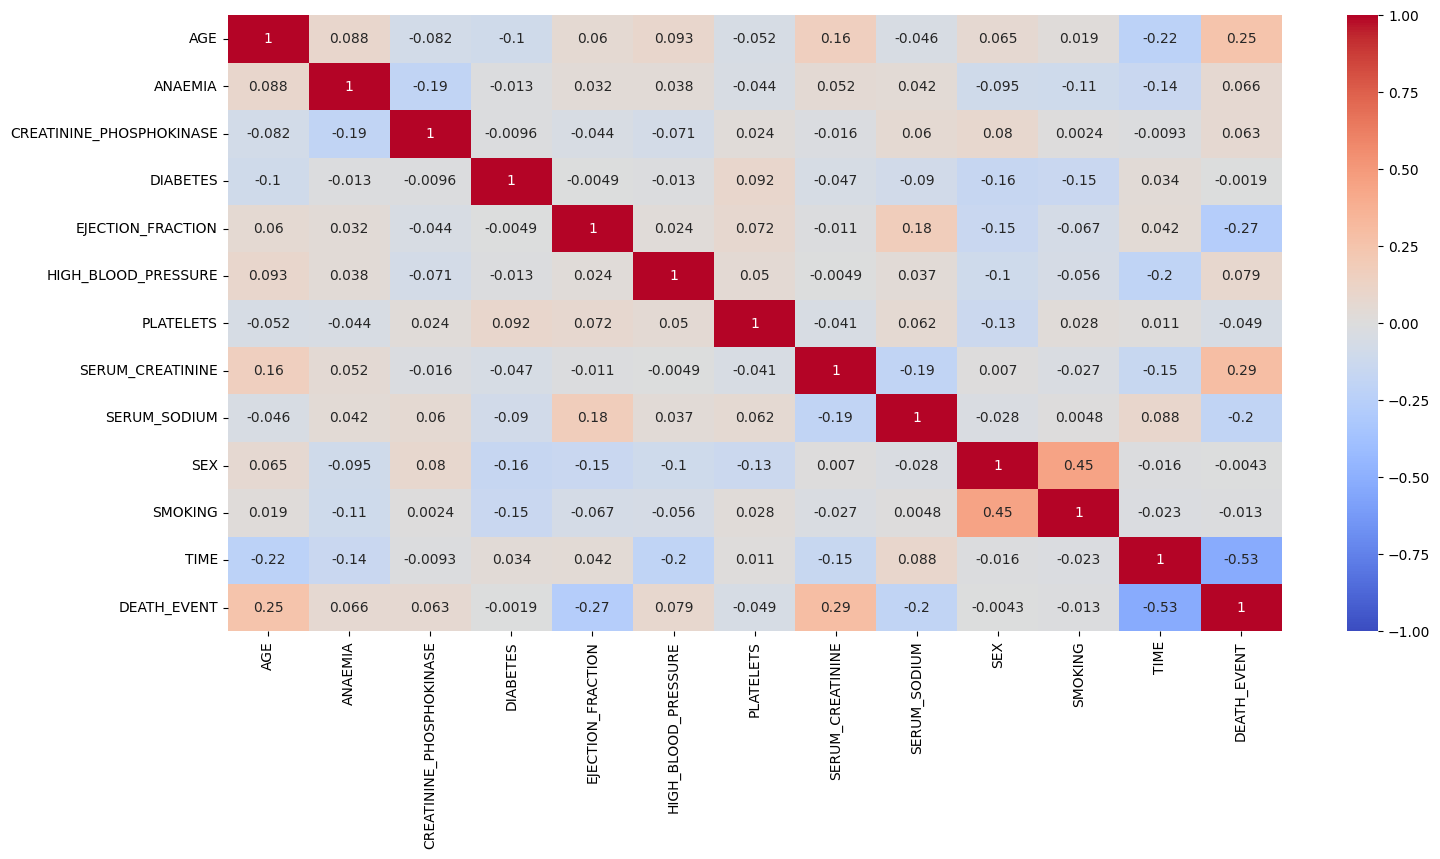

In [72]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric and categorical columns
##################################
plt.figure(figsize=(17, 8))
sns.heatmap(heart_failure_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [73]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
heart_failure_numeric = heart_failure.select_dtypes(include=['number','int'])

In [74]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = heart_failure_numeric.columns

In [75]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = heart_failure_numeric.skew()

In [76]:
##################################
# Computing the interquartile range
# for all columns
##################################
heart_failure_numeric_q1 = heart_failure_numeric.quantile(0.25)
heart_failure_numeric_q3 = heart_failure_numeric.quantile(0.75)
heart_failure_numeric_iqr = heart_failure_numeric_q3 - heart_failure_numeric_q1

In [77]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((heart_failure_numeric < (heart_failure_numeric_q1 - 1.5 * heart_failure_numeric_iqr)) | (heart_failure_numeric > (heart_failure_numeric_q3 + 1.5 * heart_failure_numeric_iqr))).sum()

In [78]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(heart_failure_numeric)] * len(heart_failure_numeric.columns))

In [79]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [80]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,AGE,0.423062,0,299,0.000000
1,CREATININE_PHOSPHOKINASE,4.463110,29,299,0.096990
2,EJECTION_FRACTION,0.555383,2,299,0.006689
3,PLATELETS,1.462321,21,299,0.070234
4,SERUM_CREATININE,4.455996,29,299,0.096990
5,SERUM_SODIUM,-1.048136,4,299,0.013378
6,TIME,0.127803,0,299,0.000000


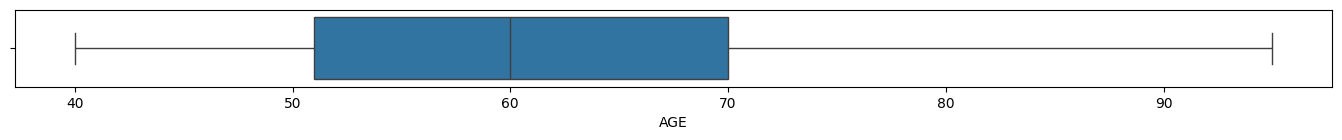

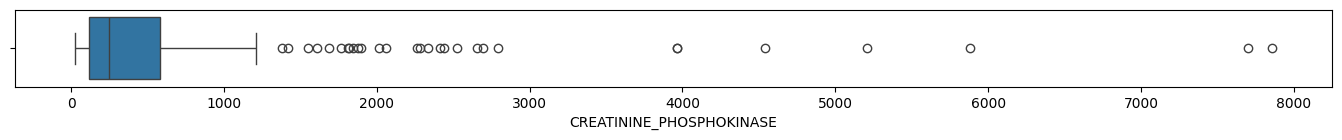

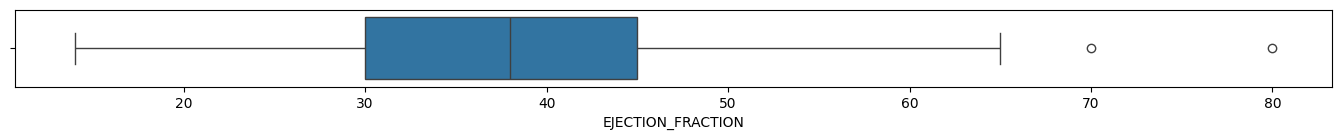

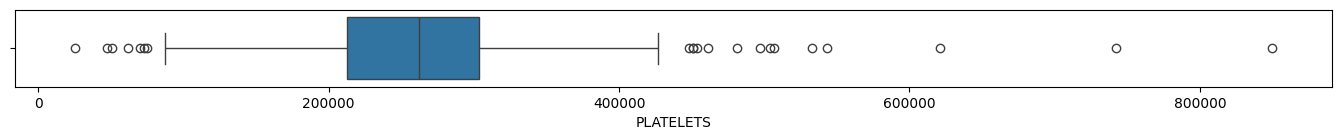

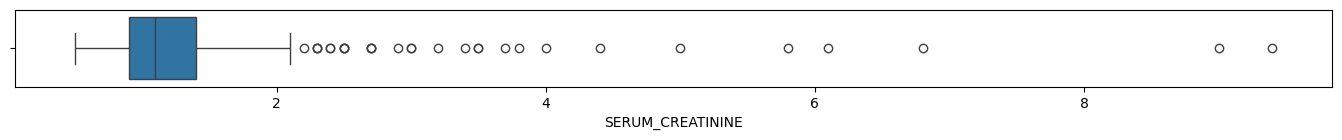

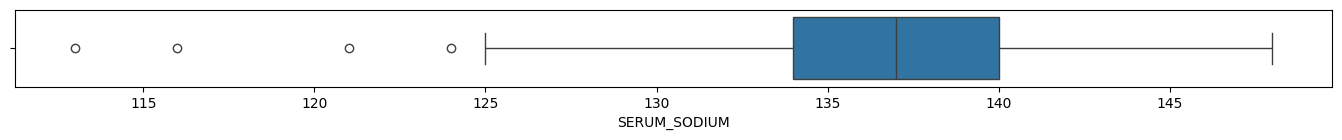

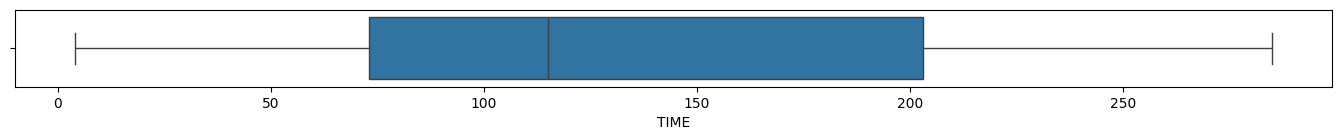

In [81]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in heart_failure_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=heart_failure_numeric, x=column)

In [82]:
##################################
# Formulating the dataset
# with numeric predictor columns only
##################################
heart_failure_numeric_predictor = heart_failure_numeric.drop('TIME', axis=1)

In [83]:
##################################
# Formulating the dataset
# with categorical or object columns only
##################################
heart_failure_categorical = heart_failure_original.select_dtypes(include=['category','object'])

In [84]:
##################################
# Evaluating a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=True)
heart_failure_numeric_predictor_transformed_array = yeo_johnson_transformer.fit_transform(heart_failure_numeric_predictor)

In [85]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
heart_failure_numeric_predictor_transformed = pd.DataFrame(heart_failure_numeric_predictor_transformed_array,
                                                           columns=heart_failure_numeric_predictor.columns)

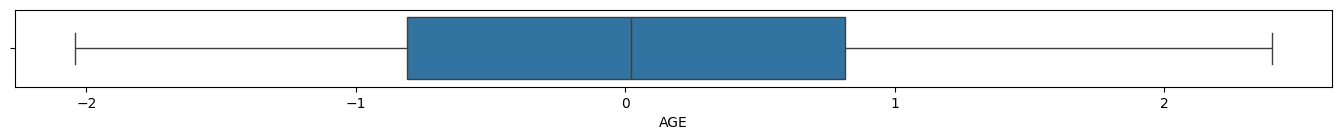

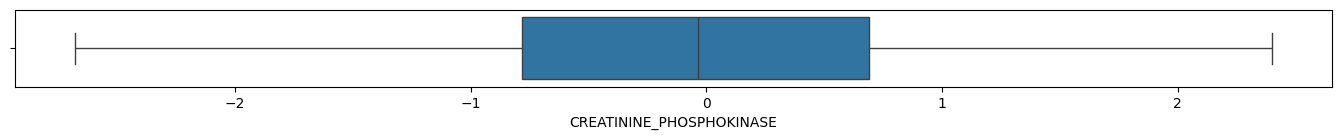

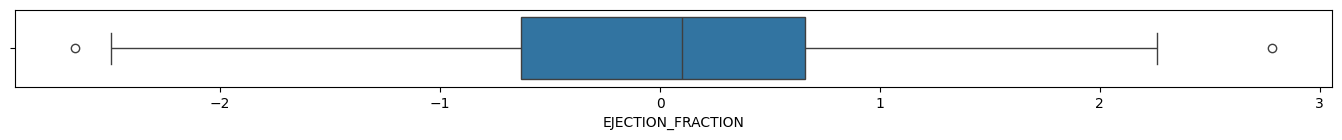

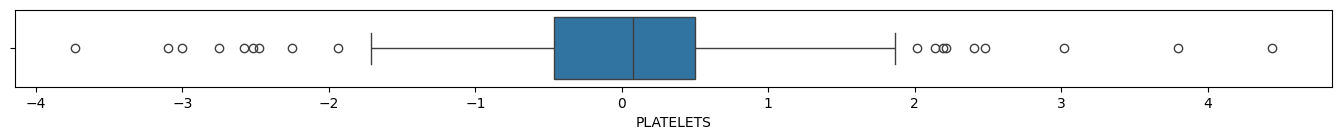

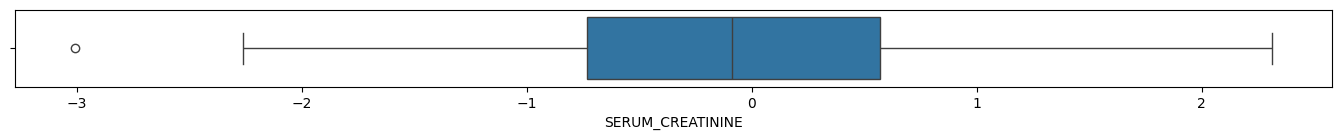

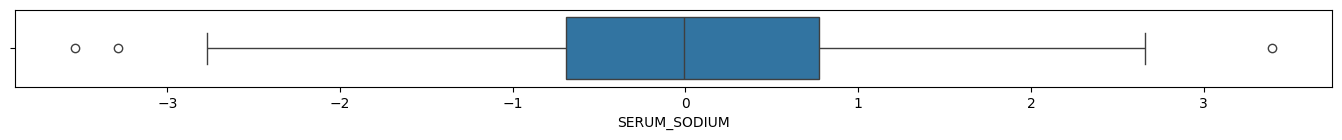

In [86]:
##################################
# Formulating the individual boxplots
# for all transformed numeric predictor columns
##################################
for column in heart_failure_numeric_predictor_transformed:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=heart_failure_numeric_predictor_transformed, x=column)

In [87]:
##################################
# Formulating the outlier summary
# for all numeric predictor columns
##################################
numeric_variable_name_list = heart_failure_numeric_predictor_transformed.columns
numeric_skewness_list = heart_failure_numeric_predictor_transformed.skew()
heart_failure_numeric_predictor_transformed_q1 = heart_failure_numeric_predictor_transformed.quantile(0.25)
heart_failure_numeric_predictor_transformed_q3 = heart_failure_numeric_predictor_transformed.quantile(0.75)
heart_failure_numeric_predictor_transformed_iqr = heart_failure_numeric_predictor_transformed_q3 - heart_failure_numeric_predictor_transformed_q1
numeric_outlier_count_list = ((heart_failure_numeric_predictor_transformed < (heart_failure_numeric_predictor_transformed_q1 - 1.5 * heart_failure_numeric_predictor_transformed_iqr)) | (heart_failure_numeric_predictor_transformed > (heart_failure_numeric_predictor_transformed_q3 + 1.5 * heart_failure_numeric_predictor_transformed_iqr))).sum()
numeric_row_count_list = list([len(heart_failure_numeric_predictor_transformed)] * len(heart_failure_numeric_predictor_transformed.columns))
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,AGE,-0.000746,0,299,0.000000
1,CREATININE_PHOSPHOKINASE,0.044225,0,299,0.000000
2,EJECTION_FRACTION,-0.006637,2,299,0.006689
3,PLATELETS,0.155360,18,299,0.060201
4,SERUM_CREATININE,0.150380,1,299,0.003344
5,SERUM_SODIUM,0.082305,3,299,0.010033


## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

## 1.6. Predictive Model Development <a class="anchor" id="1.6"></a>

### 1.6.1 Pre-Modelling Data Preparation <a class="anchor" id="1.6.1"></a>

### 1.6.2 Data Splitting <a class="anchor" id="1.6.2"></a>

### 1.6.3 Modelling Pipeline Development <a class="anchor" id="1.6.3"></a>

### 1.6.4 Semi-Parametric Model Fitting | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.4"></a>

### 1.6.5 Model Fitting using Original Training Data | Hyperparameter Tuning | Validation <a class="anchor" id="1.6.5"></a>

### 1.6.6 Model Selection <a class="anchor" id="1.6.6"></a>

### 1.6.7 Model Testing <a class="anchor" id="1.6.7"></a>

### 1.6.8 Model Inference <a class="anchor" id="1.6.8"></a>

## 1.7. Predictive Model Deployment Using Streamlit and Streamlit Community Cloud <a class="anchor" id="1.7"></a>

### 1.7.1 Model Prediction Application Code Development <a class="anchor" id="1.7.1"></a>

### 1.7.2 Model Application Programming Interface Code Development <a class="anchor" id="1.7.2"></a>

### 1.7.3 User Interface Application Code Development <a class="anchor" id="1.7.3"></a>

### 1.7.4 Web Application <a class="anchor" id="1.7.4"></a>

# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>


* **[Book]** [Clinical Prediction Models](http://clinicalpredictionmodels.org/) by Ewout Steyerberg
* **[Book]** [Survival Analysis: A Self-Learning Text](https://link.springer.com/book/10.1007/978-1-4419-6646-9/) by David Kleinbaum and Mitchel Klein
* **[Book]** [Applied Survival Analysis Using R](https://link.springer.com/book/10.1007/978-3-319-31245-3/) by Dirk Moore
* **[Book]** [Survival Analysis with Python](https://www.taylorfrancis.com/books/mono/10.1201/9781003255499/survival-analysis-python-avishek-nag) by Avishek Nag
* **[Python Library API]** [SciKit-Survival](https://pypi.org/project/scikit-survival/) by SciKit-Survival Team
* **[Python Library API]** [SciKit-Learn](https://scikit-learn.org/stable/index.html) by SciKit-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Python Library API]** [Lifelines](https://lifelines.readthedocs.io/en/latest/) by Lifelines Team
* **[Kaggle Project]** [Applied Reliability, Solutions To Problems](https://www.kaggle.com/code/keenanzhuo/applied-reliability-solutions-to-problems) by Keenan Zhuo (Kaggle)
* **[Kaggle Project]** [Survival Models VS ML Models Benchmark - Churn Tel](https://www.kaggle.com/code/caralosal/survival-models-vs-ml-models-benchmark-churn-tel) by Carlos Alonso Salcedo (Kaggle)
* **[Kaggle Project]** [Survival Analysis with Cox Model Implementation](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Bryan Boulé (Kaggle)
* **[Kaggle Project]** [Survival Analysis](https://www.kaggle.com/code/gunesevitan/survival-analysis/notebook) by Gunes Evitan (Kaggle)
* **[Kaggle Project]** [Survival Analysis of Lung Cancer Patients](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Sayan Chakraborty (Kaggle)
* **[Kaggle Project]** [COVID-19 Cox Survival Regression](https://www.kaggle.com/code/bryanb/survival-analysis-with-cox-model-implementation/notebook) by Ilias Katsabalos (Kaggle)
* **[Kaggle Project]** [Liver Cirrhosis Prediction with XGboost & EDA](https://www.kaggle.com/code/arjunbhaybhang/liver-cirrhosis-prediction-with-xgboost-eda) by Arjun Bhaybang (Kaggle)
* **[Article]** [Exploring Time-to-Event with Survival Analysis](https://towardsdatascience.com/exploring-time-to-event-with-survival-analysis-8b0a7a33a7be) by Olivia Tanuwidjaja (Towards Data Science)
* **[Article]** [The Complete Introduction to Survival Analysis in Python](https://towardsdatascience.com/the-complete-introduction-to-survival-analysis-in-python-7523e17737e6) by Marco Peixeiro (Towards Data Science)
* **[Article]** [Survival Analysis Simplified: Explaining and Applying with Python](https://medium.com/@zynp.atlii/survival-analysis-simplified-explaining-and-applying-with-python-7efacf86ba32) by Zeynep Atli (Towards Data Science)
* **[Article]** [Survival Analysis in Python (KM Estimate, Cox-PH and AFT Model)](https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d) by Rahul Raoniar (Medium)
* **[Article]** [How to Evaluate Survival Analysis Models)](https://towardsdatascience.com/how-to-evaluate-survival-analysis-models-dd67bc10caae) by Nicolo Cosimo Albanese (Towards Data Science)
* **[Article]** [Survival Analysis with Python Tutorial — How, What, When, and Why)](https://pub.towardsai.net/survival-analysis-with-python-tutorial-how-what-when-and-why-19a5cfb3c312) by Towards AI Team (Medium)
* **[Article]** [Survival Analysis: Predict Time-To-Event With Machine Learning)](https://towardsdatascience.com/survival-analysis-predict-time-to-event-with-machine-learning-part-i-ba52f9ab9a46) by Lina Faik (Medium)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 1](https://www.kdnuggets.com/2020/07/complete-guide-survival-analysis-python-part1.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 2](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-2.html) by Pratik Shukla (KDNuggets)
* **[Article]** [A Complete Guide To Survival Analysis In Python, Part 3](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Pratik Shukla (KDNuggets)
* **[Article]** [Model Explainability using SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations)](https://medium.com/@anshulgoel991/model-exploitability-using-shap-shapley-additive-explanations-and-lime-local-interpretable-cb4f5594fc1a) by Anshul Goel (Medium)
* **[Article]** [A Comprehensive Guide into SHAP (SHapley Additive exPlanations) Values](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Brain John Aboze (DeepChecks.Com)
* **[Article]** [SHAP - Understanding How This Method for Explainable AI Works](https://safjan.com/how-the-shap-method-for-explainable-ai-works/#google_vignette) by Krystian Safjan (Safjan.Com)
* **[Article]** [SHAP: Shapley Additive Explanations](https://towardsdatascience.com/shap-shapley-additive-explanations-5a2a271ed9c3) by Fernando Lopez (Medium)
* **[Article]** [Explainable Machine Learning, Game Theory, and Shapley Values: A technical review](https://www.kdnuggets.com/2020/07/guide-survival-analysis-python-part-3.html) by Soufiane Fadel (Statistics Canada)
* **[Article]** [SHAP Values Explained Exactly How You Wished Someone Explained to You](https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30) by Samuele Mazzanti (Towards Data Science)
* **[Article]** [Explaining Machine Learning Models: A Non-Technical Guide to Interpreting SHAP Analyses](https://www.aidancooper.co.uk/a-non-technical-guide-to-interpreting-shap-analyses/) by Aidan Cooper (AidanCooper.Co.UK)
* **[Article]** [Shapley Additive Explanations: Unveiling the Black Box of Machine Learning](https://python.plainenglish.io/shapley-additive-explanations-unveiling-the-black-box-of-machine-learning-477ba01ffa07) by Evertone Gomede (Medium)
* **[Article]** [SHAP (SHapley Additive exPlanations)](https://www.nerd-data.com/shap/) by Narut Soontranon (Nerd-Data.Com)
* **[Article]** [Survival Analysis](https://quantdev.ssri.psu.edu/resources/survival-analysis) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 1: How to Format Data for Several Types of Survival Analysis Models](https://quantdev.ssri.psu.edu/tutorials/part-1-how-format-data-several-types-survival-analysis-models) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 2: Single-Episode Cox Regression Model with Time-Invariant Predictors](https://quantdev.ssri.psu.edu/tutorials/part-2-single-episode-cox-regression-model-time-invariant-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 3: Single-Episode Cox Regression Model with Time-Varying Predictors](https://quantdev.ssri.psu.edu/tutorials/part-3-single-episode-cox-regression-model-time-varying-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 4: Recurring-Episode Cox Regression Model with Time-Invariant Predictors](https://quantdev.ssri.psu.edu/tutorials/part-4-recurring-episode-cox-regression-model-time-invariant-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Part 5: Recurring-Episode Cox Regression Model with Time-Varying Predictors](https://quantdev.ssri.psu.edu/tutorials/part-5-recurring-episode-cox-regression-model-time-varying-predictors) by Jessica Lougheed and Lizbeth Benson (QuantDev.SSRI.PSU.Edu)
* **[Article]** [Parametric Survival Modeling](https://devinincerti.com/2019/06/18/parametric_survival.html) by Devin Incerti (DevinIncerti.Com)
* **[Article]** [Survival Analysis Simplified: Explaining and Applying with Python](https://medium.com/@zynp.atlii/survival-analysis-simplified-explaining-and-applying-with-python-7efacf86ba32) by Zeynep Atli (Medium)
* **[Article]** [Understanding Survival Analysis Models: Bridging the Gap between Parametric and Semiparametric Approaches](https://medium.com/@zynp.atlii/understanding-survival-analysis-models-bridging-the-gap-between-parametric-and-semiparametric-923cdcfc9f05) by Zeynep Atli (Medium)
* **[Article]** [Survival Modeling — Accelerated Failure Time — XGBoost](https://towardsdatascience.com/survival-modeling-accelerated-failure-time-xgboost-971aaa1ba794) by Avinash Barnwal (Medium)
* **[Publication]** [Regression Models and Life Tables](https://rss.onlinelibrary.wiley.com/doi/abs/10.1111/j.2517-6161.1972.tb00899.x) by David Cox (Royal Statistical Society)
* **[Publication]** [Covariance Analysis of Censored Survival Data](https://pubmed.ncbi.nlm.nih.gov/4813387/) by Norman Breslow (Biometrics)
* **[Publication]** [The Efficiency of Cox’s Likelihood Function for Censored Data](https://www.jstor.org/stable/2286217) by Bradley Efron (Journal of the American Statistical Association)
* **[Publication]** [Regularization Paths for Cox’s Proportional Hazards Model via Coordinate Descent](https://doi.org/10.18637/jss.v039.i05) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software)
* **[Publication]** [Shapley Additive Explanations](https://dl.acm.org/doi/10.5555/1756006.1756007) by Noah Simon, Jerome Friedman, Trevor Hastie and Rob Tibshirani (Journal of Statistical Software) by Erik Strumbelj and Igor Kononenko (The Journal of Machine Learning Research)
* **[Publication]** [A Unified Approach to Interpreting Model Predictions](https://proceedings.neurips.cc/paper_files/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf) by Scott Lundberg and Sun-In Lee (Conference on Neural Information Processing Systems)
* **[Publication]** [Survival Analysis Part I: Basic Concepts and First Analyses](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394262/) by Taane Clark (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part II: Multivariate Data Analysis – An Introduction to Concepts and Methods](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394368/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part III: Multivariate Data Analysis – Choosing a Model and Assessing its Adequacy and Fit](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2376927/) by Mike Bradburn (British Journal of Cancer)
* **[Publication]** [Survival Analysis Part IV: Further Concepts and Methods in Survival Analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2394469/) by Taane Clark (British Journal of Cancer)
* **[Publication]** [Marginal Likelihoods Based on Cox's Regression and Life Model](https://www.jstor.org/stable/2334538) by Jack Kalbfleisch and Ross Prentice (Biometrika)
* **[Publication]** [Hazard Rate Models with Covariates](https://www.jstor.org/stable/2529934) by Jack Kalbfleisch and Ross Prentice (Biometrics)
* **[Publication]** [Linear Regression with Censored Data](https://www.jstor.org/stable/2335161) by Jonathan Buckley and Ian James (Biometrika)
* **[Publication]** [A Statistical Distribution Function of Wide Applicability](https://www.semanticscholar.org/paper/A-Statistical-Distribution-Function-of-Wide-Weibull/88c37770028e7ed61180a34d6a837a9a4db3b264) by Waloddi Weibull (Journal of Applied Mechanics)
* **[Publication]** [Exponential Survivals with Censoring and Explanatory Variables](https://www.jstor.org/stable/2334539) by Ross Prentice (Biometrika)
* **[Publication]** [The Lognormal Distribution, with Special Reference to its Uses in Economics](https://www.semanticscholar.org/paper/The-Lognormal-Distribution%2C-with-Special-Reference-Corlett-Aitchison/1f59c53ff512fa77e7aee5e6d98b1786c2aaf129) by John Aitchison and James Brown (Economics Applied Statistics)
* **[Course]** [Survival Analysis in Python](https://app.datacamp.com/learn/courses/survival-analysis-in-python) by Shae Wang (DataCamp)

In [88]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))